In [56]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [57]:
#read the person data from data frolder person_id.xlsx
person_data = pd.read_excel("person_id.xlsx")

In [63]:

#read release data
release = pd.read_excel("releases.xlsx") 

In [59]:
# read demographic data
demo = pd.read_excel("demographics.xlsx")

In [60]:
#read tthe data from the personal data file
person_data = pd.read_excel("person_id.xlsx")


In [97]:
# read the data from the institutional work
institutional = pd.read_excel("institutional_work.xlsx")

In [62]:
# read violations data
violation = pd.read_excel("violations.xlsx") 

In [ ]:
## read classes data
cla= pd.read_excel("classes.xlsx")

In [95]:
# read supervision data
supervision = pd.read_excel("community_supervision.xlsx")

## Question 1 What are the characteristics of the population?

In [8]:
release.head()

,PERSON_ID,CYCLE,ADMISSION_DATE,RELEASE_DATE,AGE_AT_ADMISSION,AGE_AT_EXIT,COUNTY,MOCODE_DESC,OFFENSE_GROUP,SENTENCE_YEARS,ADMISSION_STATUS,ADMISSION_TYPE,RELEASE_TYPE,LAST_CUSTODY_LEVEL,LAST_MH_CODE,LAST_M_CODE,LAST_E_CODE,LAST_V_CODE,LAST_I_CODE,DEATH_DATE
0,97737218.0,2.0,2011-04-20,2012-11-02,47,48,DEKALB,23013 TAMPER WITH MOTOR VEH-1S,NONVIOLENT,5,PB,S,PPR,C-1,1,1,3,2,1,NaN
1,80832089.0,3.0,2016-05-11,2016-09-08,57,57,ST. FRANCOIS,13029 DOMESTIC ASSAULT-2ND DEG,VIOLENT,7,PB,I,PRB,,0,0,0,0,0,NaN
2,88054449.0,2.0,2013-06-05,2014-01-21,52,52,,22352 PR OFNDR RESIDE-1000 FT-,SEXCHLABUS,3,PB,S,PPR,C-1,2,1,1,5,1,NaN
3,68129888.0,2.0,2007-10-17,2009-04-03,42,43,,32450 POSS CONTROLLED SUBSTANC,DRUG,7,PB,S,PPR,C-1,3,2,1,2,1,NaN
4,78516984.0,2.0,2011-09-09,2015-06-12,53,56,ST. LOUIS COUNTY,13029 DOMESTIC ASSAULT-2ND DEG,VIOLENT,7,PB,S,PPR,C-1,1,2,1,2,1,NaN


In [54]:
# Ensure RELEASE_DATE and ADMISSION_DATE are datetime
release['RELEASE_DATE'] = pd.to_datetime(release['RELEASE_DATE'])
release['ADMISSION_DATE'] = pd.to_datetime(release['ADMISSION_DATE'])

# Get the range of years in the data
years = release['RELEASE_DATE'].dt.year.unique()
years = sorted(years)

results = []

for year in years:
    dec_1 = pd.Timestamp(year=year, month=12, day=1)
    # Count unique PERSON_IDs incarcerated on December 1st of that year
    mask = (release['ADMISSION_DATE'] <= dec_1) & (release['RELEASE_DATE'] > dec_1)
    count = release[mask]['PERSON_ID'].nunique()
    results.append({'YEAR': year, 'UNIQUE_PERSON_COUNT_ON_DEC_1': count})

unique_persons_dec1 = pd.DataFrame(results)
unique_persons_dec1

,YEAR,UNIQUE_PERSON_COUNT_ON_DEC_1
0,2009,9472
1,2010,9194
2,2011,9415
3,2012,9773
4,2013,9792
5,2014,9902
6,2015,9825
7,2016,9967
8,2017,10186
9,2018,9354


In [55]:
#distribution of Male and Female population per year - final_grouped_df
fig = px.bar(unique_persons_dec1, x='YEAR', y='UNIQUE_PERSON_COUNT_ON_DEC_1')
fig.show() 

In [27]:
# Ensure RELEASE_DATE and ADMISSION_DATE are datetime
release['RELEASE_DATE'] = pd.to_datetime(release['RELEASE_DATE'])
release['ADMISSION_DATE'] = pd.to_datetime(release['ADMISSION_DATE'])

# Get the range of years in the data
years = release['RELEASE_DATE'].dt.year.unique()
years = sorted(years)

results = []

for year in years:
    dec_31 = pd.Timestamp(year=year, month=12, day=31)
    # Count unique PERSON_IDs incarcerated on December 31st of that year
    mask = (release['ADMISSION_DATE'] <= dec_31) & (release['RELEASE_DATE'] > dec_31)
    count = release[mask]['PERSON_ID'].nunique()
    results.append({'YEAR': year, 'UNIQUE_PERSON_COUNT_ON_DEC_31': count})

unique_persons_dec31 = pd.DataFrame(results)
print(unique_persons_dec31)

    YEAR  UNIQUE_PERSON_COUNT_ON_DEC_31
0   2009                           9424
1   2010                           9267
2   2011                           9445
3   2012                           9637
4   2013                           9722
5   2014                           9898
6   2015                           9806
7   2016                           9923
8   2017                          10104
9   2018                           9207
10  2019                           6925
11  2020                           5265
12  2021                           4646
13  2022                           3344
14  2023                              0


In [29]:
max(release['ADMISSION_DATE'])

Timestamp('2023-12-08 00:00:00')

In [28]:
max(release['RELEASE_DATE'])

Timestamp('2023-12-30 00:00:00')

In [26]:
# filter rows with release year 2024 in descending order of relaease date
release_filtered = release[release['ADMISSION_DATE'].dt.year == 2023].sort_values(by='ADMISSION_DATE', ascending=False)
release_filtered


,PERSON_ID,CYCLE,ADMISSION_DATE,RELEASE_DATE,AGE_AT_ADMISSION,AGE_AT_EXIT,COUNTY,MOCODE_DESC,OFFENSE_GROUP,SENTENCE_YEARS,...,ADMISSION_TYPE,RELEASE_TYPE,LAST_CUSTODY_LEVEL,LAST_MH_CODE,LAST_M_CODE,LAST_E_CODE,LAST_V_CODE,LAST_I_CODE,DEATH_DATE,YEAR
84463,30880632.0,2.0,2023-12-08,2023-12-29,33,33,DEKALB,52ADA DELIVER OR POSSESS WEAPO,VIOLENT,3,...,S,CDR,C-2,1,2,1,3,2,NaN,2023
108338,26030575.0,1.0,2023-11-16,2023-12-21,24,24,ST. LOUIS COUNTY,22AAA BURGLARY - 2ND DEGREE,NONVIOLENT,6,...,S,CDR,C-5,3,2,4,4,5,NaN,2023
109449,56721424.0,1.0,2023-11-15,2023-11-29,21,21,BOONE,13AAC ASSAULT - 3RD DEGREE,VIOLENT,4,...,O,PRB,,0,0,0,0,0,NaN,2023
93984,52943776.0,1.0,2023-10-24,2023-12-02,32,32,TANEY,32450 POSS CONTROLLED SUBSTANC,DRUG,4,...,S,MXR,C-1,1,1,4,2,1,NaN,2023
54866,23634761.0,2.0,2023-10-24,2023-11-29,37,37,BARTON,22AAA BURGLARY - 2ND DEGREE,NONVIOLENT,7,...,L,PRB,,0,0,0,0,0,NaN,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110209,38595121.0,1.0,2023-01-03,2023-05-03,35,35,,35ACP POSSESS CONTROL SUBSTANC,DRUG,7,...,O,PRB,,0,0,0,0,0,NaN,2023
109257,37594306.0,1.0,2023-01-03,2023-05-03,22,22,,12AAB ROBBERY - 2ND DEGREE,VIOLENT,10,...,O,PRB,,0,0,0,0,0,NaN,2023
110314,87761031.0,1.0,2023-01-03,2023-05-03,31,32,SCHUYLER,28AAR RECEIVING STOLEN PROPERT,NONVIOLENT,7,...,O,PRB,,0,0,0,0,0,NaN,2023
110358,97061229.0,1.0,2023-01-03,2023-05-03,27,28,PLATTE,13ABL DOMESTIC ASSAULT - 2ND D,VIOLENT,4,...,O,PRB,,0,0,0,0,0,NaN,2023


In [30]:
merged = pd.merge(release, demo, on="PERSON_ID", how="left")

final_df = merged[["PERSON_ID", "SEX", "RACE", "ETHNICITY","ADMISSION_DATE", "RELEASE_DATE", "RELEASE_TYPE","COUNTY","OFFENSE_GROUP"]]

In [49]:

# Drop rows with missing admission or release dates
final_df = final_df.dropna(subset=["ADMISSION_DATE", "RELEASE_DATE"])

# Get the list of unique years from the release dates
years = sorted(final_df["RELEASE_DATE"].dt.year.dropna().unique())

# Store results in a list
all_results = []

for year in years:
    dec_1 = pd.Timestamp(year=year, month=12, day=1)

    # Filter incarcerated individuals on Dec 1 of that year
    mask = (final_df["ADMISSION_DATE"] <= dec_1) & (final_df["RELEASE_DATE"] > dec_1)
    active_on_dec1 = final_df[mask]

    # Group by SEX, RACE, COUNTY, OFFENSE_GROUP and count unique PERSON_IDs
    grouped = (
        active_on_dec1.groupby(["SEX"])
        .agg(UNIQUE_PERSON_COUNT=("PERSON_ID", "nunique"))
        .reset_index()
    )

    grouped["YEAR"] = year  # Add the year to the grouped DataFrame
    all_results.append(grouped)

# Combine all years into one DataFrame
final_grouped_df = pd.concat(all_results, ignore_index=True)

# Show sample of final grouped output
final_grouped_df


,SEX,UNIQUE_PERSON_COUNT,YEAR
0,F,1074,2009
1,M,8398,2009
2,F,1059,2010
3,M,8135,2010
4,F,1138,2011
5,M,8277,2011
6,F,1212,2012
7,M,8561,2012
8,F,1243,2013
9,M,8549,2013


In [50]:
#distribution of Male and Female population per year - final_grouped_df
fig = px.bar(final_grouped_df, x='YEAR', y='UNIQUE_PERSON_COUNT', color='SEX')
fig.show()  


In [41]:

# Drop rows with missing admission or release dates
final_df = final_df.dropna(subset=["ADMISSION_DATE", "RELEASE_DATE"])

# Get the list of unique years from the release dates
years = sorted(final_df["RELEASE_DATE"].dt.year.dropna().unique())

# Store results in a list
all_results = []

for year in years:
    dec_1 = pd.Timestamp(year=year, month=12, day=1)

    # Filter incarcerated individuals on Dec 1 of that year
    mask = (final_df["ADMISSION_DATE"] <= dec_1) & (final_df["RELEASE_DATE"] > dec_1)
    active_on_dec1 = final_df[mask]

    # Group by SEX, RACE, COUNTY, OFFENSE_GROUP and count unique PERSON_IDs
    grouped = (
        active_on_dec1.groupby(["OFFENSE_GROUP"])
        .agg(UNIQUE_PERSON_COUNT=("PERSON_ID", "nunique"))
        .reset_index()
    )

    grouped["YEAR"] = year  # Add the year to the grouped DataFrame
    all_results.append(grouped)

# Combine all years into one DataFrame
final_grouped_df = pd.concat(all_results, ignore_index=True)

# Show sample of final grouped output
final_grouped_df


,OFFENSE_GROUP,UNIQUE_PERSON_COUNT,YEAR
0,,5,2009
1,DRUG,2060,2009
2,DWI,382,2009
3,NONVIOLENT,3427,2009
4,SEXCHLABUS,859,2009
...,...,...,...
78,DRUG,136,2023
79,DWI,5,2023
80,NONVIOLENT,144,2023
81,SEXCHLABUS,17,2023


In [ ]:

# Get list of unique offense groups
offense_groups = final_grouped_df["OFFENSE_GROUP"].unique()

# Create a separate trace for each offense group
fig = go.Figure()

# Add a trace per offense group
for group in offense_groups:
    group_df = final_grouped_df[final_grouped_df["OFFENSE_GROUP"] == group]
    fig.add_trace(go.Scatter(
        x=group_df["YEAR"],
        y=group_df["UNIQUE_PERSON_COUNT"],
        mode="lines+markers",
        name=group,
        visible=False
    ))

# Make the first trace visible by default
fig.data[0].visible = True

# Create dropdown menu
dropdown_buttons = [
    {
        "label": group,
        "method": "update",
        "args": [
            {"visible": [i == j for i in range(len(offense_groups))]},
            {"title": f"Trend for {group}"}
        ]
    }
    for j, group in enumerate(offense_groups)
]

# Add dropdown to layout
fig.update_layout(
    title="Yearly Incarceration Trend by Offense Group",
    xaxis_title="Year",
    yaxis_title="Unique Person Count",
    updatemenus=[{
        "buttons": dropdown_buttons,
        "direction": "down",
        "showactive": True,
        "x": 1.15,
        "xanchor": "left",
        "y": 1.05,
        "yanchor": "top"
    }],
    height=500
)

fig.show()


## Question 2 : Have there been changes in the pattern of violation behavior over time?

In [64]:
violation.head()

,PERSON_ID,CYCLE,SEQUENCE_NO,VIOLATION_DATE,PRIMARY_RULE,SECONDARY_RULE
0,78516984.0,2.0,1,2013-12-02,22.1,24.1
1,63649787.0,3.0,27,2011-12-08,20.1,41.1
2,63649787.0,3.0,28,2011-12-12,33.2,41.1
3,63649787.0,3.0,29,2012-03-08,19.1,21.1
4,63649787.0,3.0,30,2012-09-09,20.1,30.1


In [65]:
violation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222646 entries, 0 to 222645
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PERSON_ID       222605 non-null  float64
 1   CYCLE           222605 non-null  float64
 2   SEQUENCE_NO     222646 non-null  int64  
 3   VIOLATION_DATE  222646 non-null  object 
 4   PRIMARY_RULE    222646 non-null  float64
 5   SECONDARY_RULE  222646 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 10.2+ MB


In [66]:
#Analyze violation trends over time using the violations dataset.
#Convert 'VIOLATION_DATE' to datetime format.
violation['VIOLATION_DATE'] = pd.to_datetime(violation['VIOLATION_DATE'], errors='coerce')
#Extract year from each date and create a new column called 'VIOLATION_YEAR'.
#Group the data by 'VIOLATION_YEAR' and count the number of violations for each year.
violation['VIOLATION_YEAR'] = violation['VIOLATION_DATE'].dt.year

In [67]:
# count violations trends over the years
violation_year_trends = violation.groupby('VIOLATION_YEAR').size().reset_index(name='VIOLATION_COUNT')
# Display the first few rows of the violation year trends.  
violation_year_trends.head()
violation_year_trends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   VIOLATION_YEAR   18 non-null     int32
 1   VIOLATION_COUNT  18 non-null     int64
dtypes: int32(1), int64(1)
memory usage: 344.0 bytes


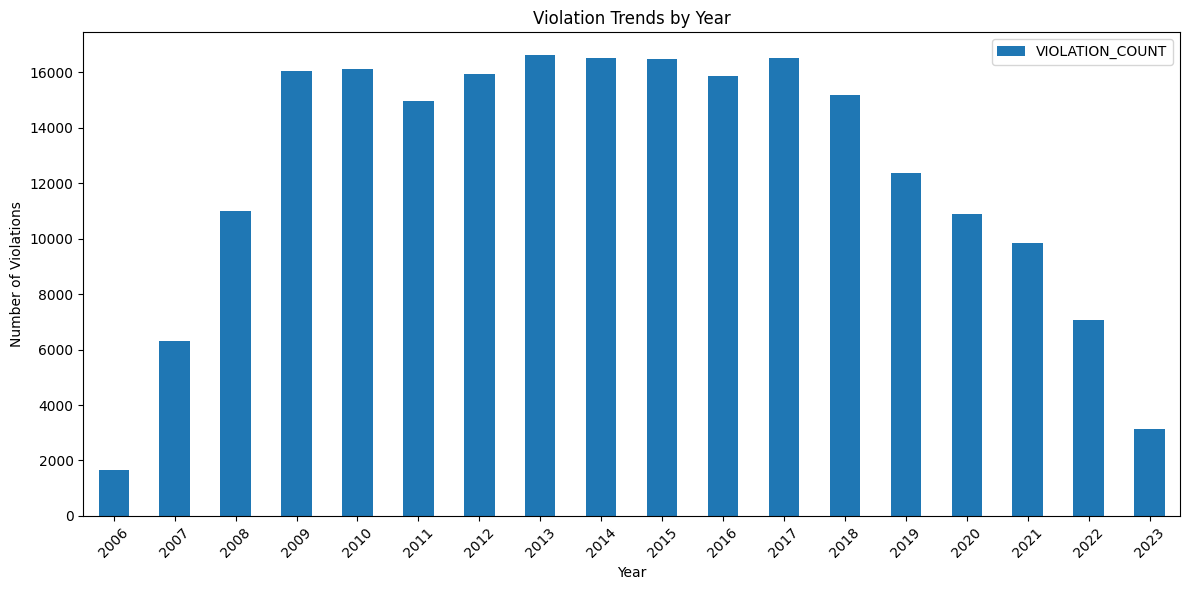

In [ ]:
# display the violation trends by year diagram    
violation_year_trends.plot(x='VIOLATION_YEAR', y='VIOLATION_COUNT', kind='bar', figsize=(12, 6))
plt.title('Violation Trends by Year')
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.xticks(rotation=45)
plt.tight_layout()
      


In [72]:

# Group by YEAR and PRIMARY_RULE and count
rule_counts = (
    violation.groupby(["VIOLATION_YEAR", "PRIMARY_RULE"])
    .size()
    .reset_index(name="VIOLATION_COUNT")
)

# Get top 3 violations for each year
top3_rules_per_year = (
    rule_counts.sort_values(["VIOLATION_YEAR", "VIOLATION_COUNT"], ascending=[True, False])
    .groupby("VIOLATION_YEAR")
    .head(3)
    .reset_index(drop=True)
)

# Show the result
top3_rules_per_year.head()


,VIOLATION_YEAR,PRIMARY_RULE,VIOLATION_COUNT
0,2006,20.1,320
1,2006,19.1,221
2,2006,19.4,154
3,2007,20.1,1432
4,2007,19.1,866


In [74]:
#convert primary rule to string
top3_rules_per_year['PRIMARY_RULE'] = top3_rules_per_year['PRIMARY_RULE'].astype(str)

In [75]:
fig = px.bar(top3_rules_per_year, x='VIOLATION_YEAR', y='VIOLATION_COUNT', color='PRIMARY_RULE')
fig.show()  

## Question 3 : What are the most popular classes? And, are the successful completions rates comparable between them?

In [76]:

cla.head()

,PERSON_ID,CYCLE,PROGRAM_TITLE,CLASS_TITLE,START_DATE,STOP_DATE,EXIT_TYPE_CD
0,97737218.0,2.0,ANGER,ANGER MANAGEMENT,2012-03-15,2012-06-21,SFL
1,80832089.0,3.0,COGNITIVE,PATHWAY TO CHANGE,2016-08-02,2016-08-18,SFL
2,80832089.0,3.0,INSTITUTIONAL TREATMENT,"SHORT TERM (559.115, 217.785, BOARD)",2016-06-02,2016-09-08,SFL
3,68129888.0,2.0,LIFE SKILLS,EMPLOYABILITY SKILLS/LIFE SKILLS,2008-12-18,2009-02-25,SFL
4,78516984.0,2.0,ANGER,ANGER MANAGEMENT,2014-03-12,2014-05-28,SFL


In [77]:
cla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193202 entries, 0 to 193201
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   PERSON_ID      193192 non-null  float64
 1   CYCLE          193192 non-null  float64
 2   PROGRAM_TITLE  193202 non-null  object 
 3   CLASS_TITLE    193202 non-null  object 
 4   START_DATE     193202 non-null  object 
 5   STOP_DATE      193202 non-null  object 
 6   EXIT_TYPE_CD   193202 non-null  object 
dtypes: float64(2), object(5)
memory usage: 10.3+ MB


In [79]:
# Ensure START_DATE is in datetime format
cla['START_DATE'] = pd.to_datetime(cla['START_DATE'], errors='coerce')  
# Extract year from each date and create a new column called 'START_YEAR'.
cla['START_YEAR'] = cla['START_DATE'].dt.year


In [81]:
cla.head()

,PERSON_ID,CYCLE,PROGRAM_TITLE,CLASS_TITLE,START_DATE,STOP_DATE,EXIT_TYPE_CD,START_YEAR
0,97737218.0,2.0,ANGER,ANGER MANAGEMENT,2012-03-15,2012-06-21,SFL,2012
1,80832089.0,3.0,COGNITIVE,PATHWAY TO CHANGE,2016-08-02,2016-08-18,SFL,2016
2,80832089.0,3.0,INSTITUTIONAL TREATMENT,"SHORT TERM (559.115, 217.785, BOARD)",2016-06-02,2016-09-08,SFL,2016
3,68129888.0,2.0,LIFE SKILLS,EMPLOYABILITY SKILLS/LIFE SKILLS,2008-12-18,2009-02-25,SFL,2008
4,78516984.0,2.0,ANGER,ANGER MANAGEMENT,2014-03-12,2014-05-28,SFL,2014


In [86]:

# Count how many people enrolled in each class
class_enrollment_count = cla.groupby(['CLASS_TITLE','START_YEAR']).size().reset_index(name='ENROLLMENT_COUNT')
# Display the class enrollment counts.
class_enrollment_count

,CLASS_TITLE,START_YEAR,ENROLLMENT_COUNT
0,10 WEEK PARTIAL DAY TREATMENT,2009,1
1,10 WEEK PARTIAL DAY TREATMENT,2010,20
2,10 WEEK PARTIAL DAY TREATMENT,2011,19
3,10 WEEK PARTIAL DAY TREATMENT,2012,18
4,10 WEEK PARTIAL DAY TREATMENT,2013,22
...,...,...,...
1280,WORKING A PROGRAM I,2018,6
1281,WORKING A PROGRAM II,2003,2
1282,WORKPLACE ESSENTIAL SKILLS,2007,1
1283,WORKPLACE ESSENTIAL SKILLS,2008,12


In [87]:
# Group by CLASS_TITLE and START_YEAR to get enrollment counts
class_enrollment_count = (
    cla.groupby(['START_YEAR', 'CLASS_TITLE'])
    .size()
    .reset_index(name='ENROLLMENT_COUNT')
)

# Sort by year and enrollment count descending
sorted_enrollments = class_enrollment_count.sort_values(
    ['START_YEAR', 'ENROLLMENT_COUNT'], ascending=[True, False]
)

# Pick the top class per year
most_popular_class_per_year = sorted_enrollments.drop_duplicates(subset=['START_YEAR'])

# Display the result
most_popular_class_per_year


,START_YEAR,CLASS_TITLE,ENROLLMENT_COUNT
0,1993,"SHORT TERM (559.115, 217.785, BOARD)",1
1,1995,"SHORT TERM (559.115, 217.785, BOARD)",2
2,1996,LONG TERM THERAPEUTIC COMMUNITY,1
5,1997,LONG TERM THERAPEUTIC COMMUNITY,3
11,1998,"SHORT TERM (559.115, 217.785, BOARD)",5
14,1999,LONG TERM THERAPEUTIC COMMUNITY,5
33,2000,SUBSTANCE ABUSE EDUCATION,18
58,2001,SUBSTANCE ABUSE EDUCATION,107
84,2002,SUBSTANCE ABUSE EDUCATION,115
113,2003,SUBSTANCE ABUSE EDUCATION,90


In [94]:
most_popular_class_per_year = most_popular_class_per_year[most_popular_class_per_year['START_YEAR'] >= 2000]
fig = px.bar(most_popular_class_per_year, x='START_YEAR', y='ENROLLMENT_COUNT', color='CLASS_TITLE')
fig.show()  

In [91]:
#  Get most popular class per year
class_enrollment_count = (
    cla.groupby(['START_YEAR', 'CLASS_TITLE'])
    .size()
    .reset_index(name='ENROLLMENT_COUNT')
)

# Sort and get top class per year
most_popular_class_per_year = (
    class_enrollment_count
    .sort_values(['START_YEAR', 'ENROLLMENT_COUNT'], ascending=[True, False])
    .drop_duplicates(subset=['START_YEAR'])
)

#  Merge with original cla to get EXIT_TYPE_CD
# This filters only the rows that match the popular class per year
cla["START_YEAR"] = pd.to_datetime(cla["START_DATE"], errors='coerce').dt.year  # Ensure correct year format
merged = pd.merge(cla, most_popular_class_per_year, on=["START_YEAR", "CLASS_TITLE"], how="inner")

#  Calculate SFL rate
sfl_stats = (
    merged.groupby(["START_YEAR", "CLASS_TITLE"])
    .agg(
        TOTAL_ENROLLMENTS=('PERSON_ID', 'count'),
        SFL_COMPLETIONS=('EXIT_TYPE_CD', lambda x: (x == 'SFL').sum())
    )
    .reset_index()
)

# Add SFL rate column
sfl_stats["SFL_RATE (%)"] = (sfl_stats["SFL_COMPLETIONS"] / sfl_stats["TOTAL_ENROLLMENTS"] * 100).round(2)

# Show results
sfl_stats.head()


,START_YEAR,CLASS_TITLE,TOTAL_ENROLLMENTS,SFL_COMPLETIONS,SFL_RATE (%)
0,1993,"SHORT TERM (559.115, 217.785, BOARD)",1,0,0.0
1,1995,"SHORT TERM (559.115, 217.785, BOARD)",2,0,0.0
2,1996,LONG TERM THERAPEUTIC COMMUNITY,1,0,0.0
3,1997,LONG TERM THERAPEUTIC COMMUNITY,3,3,100.0
4,1998,"SHORT TERM (559.115, 217.785, BOARD)",5,0,0.0


In [93]:
sfl_stats = sfl_stats[sfl_stats['START_YEAR']>=2000]
# Create line chart
fig = px.line(
    sfl_stats,
    x="START_YEAR",
    y="SFL_RATE (%)",
    color="CLASS_TITLE",
    markers=True,
    title=" Successful Completion Rate for Most Popular Class Each Year",
    labels={"START_YEAR": "Year", "SFL_RATE (%)": "SFL Completion Rate (%)"},
)

fig.update_layout(
    xaxis=dict(dtick=1),
    yaxis=dict(range=[0, 100]),
    hovermode="x unified",
    legend_title="Class Title"
)

fig.show()


## Question 4: Are there correlates between institutional work assignments and other variables, like conduct violations?

In [98]:

# display entire institutional work data
institutional.head()

,PERSON_ID,CYCLE,START_DATE,STOP_DATE,JOB_DESCRIPTION
0,97737218.0,2.0,2011-07-01,2012-07-19,Landscaping
1,97737218.0,2.0,2012-07-19,2012-11-02,Building Maintenance
2,88054449.0,2.0,2013-07-31,2013-10-15,Laundering/Dry Cleaning
3,88054449.0,2.0,2013-10-16,2014-01-21,Janitorial Services
4,68129888.0,2.0,2007-12-06,2008-03-25,Non-Food Handler


In [99]:
institutional.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358597 entries, 0 to 358596
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PERSON_ID        358584 non-null  float64
 1   CYCLE            358584 non-null  float64
 2   START_DATE       358597 non-null  object 
 3   STOP_DATE        358597 non-null  object 
 4   JOB_DESCRIPTION  358597 non-null  object 
dtypes: float64(2), object(3)
memory usage: 13.7+ MB


In [108]:
violation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222645 entries, 0 to 222645
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PERSON_ID       222604 non-null  float64       
 1   CYCLE           222604 non-null  float64       
 2   SEQUENCE_NO     222645 non-null  int64         
 3   VIOLATION_DATE  222645 non-null  datetime64[ns]
 4   PRIMARY_RULE    222645 non-null  float64       
 5   SECONDARY_RULE  222645 non-null  float64       
 6   VIOLATION_YEAR  222645 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1)
memory usage: 12.7 MB


In [103]:
# Create a flag for those who participated in institutional work
institutional_flag = institutional.copy()
institutional_flag["WORKED"] = True

In [109]:
# Count number of violations per person
violations_count = violation.groupby(['PERSON_ID','CYCLE']).size().reset_index(name='VIOLATION_COUNT')
# Merge the institutional work data with the violations count   
institutional_with_violations = pd.merge(institutional_flag, violations_count, on=('PERSON_ID','CYCLE'), how='left')
# Display the first few rows of the merged data.
institutional_with_violations.head()

,PERSON_ID,CYCLE,START_DATE,STOP_DATE,JOB_DESCRIPTION,WORKED,VIOLATION_COUNT
0,97737218.0,2.0,2011-07-01,2012-07-19,Landscaping,True,NaN
1,97737218.0,2.0,2012-07-19,2012-11-02,Building Maintenance,True,NaN
2,88054449.0,2.0,2013-07-31,2013-10-15,Laundering/Dry Cleaning,True,NaN
3,88054449.0,2.0,2013-10-16,2014-01-21,Janitorial Services,True,NaN
4,68129888.0,2.0,2007-12-06,2008-03-25,Non-Food Handler,True,NaN


In [112]:
#filter rows where VIOLATION_COUNT  not NaN
institutional_with_violations = institutional_with_violations[institutional_with_violations['VIOLATION_COUNT']>0]
institutional_with_violations.head()

,PERSON_ID,CYCLE,START_DATE,STOP_DATE,JOB_DESCRIPTION,WORKED,VIOLATION_COUNT
10,78516984.0,2.0,2011-10-04,2011-10-18,Janitorial Services,True,1.0
11,78516984.0,2.0,2011-10-18,2011-10-28,Janitorial Services,True,1.0
12,78516984.0,2.0,2011-10-28,2012-09-27,Instructor/Tutor,True,1.0
13,78516984.0,2.0,2012-10-03,2013-01-11,Instructor/Tutor,True,1.0
14,78516984.0,2.0,2013-12-18,2014-05-27,Instructor/Tutor,True,1.0


In [ ]:
violations = violations.drop_duplicates(subset="PERSON_ID")
institutional = institutional.drop_duplicates(subset="PERSON_ID")

In [ ]:
# Merge work flag into the violation count table
institutional_with_violations['WORKED'] = institutional_with_violations['WORKED'].fillna(False)
# Display the first few rows of the final merged data.

institutional_with_violations.head()

,PERSON_ID,CYCLE,START_DATE,STOP_DATE,JOB_DESCRIPTION,WORKED,VIOLATION_COUNT
0,97737218.0,2.0,2011-07-01,2012-07-19,Landscaping,True,NaN
1,97737218.0,2.0,2012-07-19,2012-11-02,Building Maintenance,True,NaN
2,88054449.0,2.0,2013-07-31,2013-10-15,Laundering/Dry Cleaning,True,NaN
3,88054449.0,2.0,2013-10-16,2014-01-21,Janitorial Services,True,NaN
4,68129888.0,2.0,2007-12-06,2008-03-25,Non-Food Handler,True,NaN


In [ ]:

# Group by work status and summarize the number of violations
work_summary = institutional_with_violations.groupby('WORKED')['VIOLATION_COUNT'].agg(['count', 'sum', 'mean']).reset_index()
# Display results
print("work_summary")
print(work_summary)

work_summary
   WORKED   count        sum      mean
0    True  268022  2555290.0  9.533882


## Question 5 :How many people return to prison within two years of release?

In [ ]:

df.columns = df.columns.str.strip().str.upper()

# Convert dates to datetime format
df['ADMISSION_DATE'] = pd.to_datetime(df['ADMISSION_DATE'])
df['RELEASE_DATE'] = pd.to_datetime(df['RELEASE_DATE'])

# Sort by person and admission date
df = df.sort_values(by=['PERSON_ID', 'ADMISSION_DATE'])

# Shift admission date to next row to detect return
df['NEXT_ADMISSION_DATE'] = df.groupby('PERSON_ID')['ADMISSION_DATE'].shift(-1)

# Calculate days between release and next admission
df['DAYS_BETWEEN'] = (df['NEXT_ADMISSION_DATE'] - df['RELEASE_DATE']).dt.days

# Flag returns within 730 days (2 years)
df['RETURN_WITHIN_2YRS'] = (df['DAYS_BETWEEN'] > 0) & (df['DAYS_BETWEEN'] <= 730)

# Count how many unique people returned within 2 years
returned_ids = df[df['RETURN_WITHIN_2YRS'] == True]['PERSON_ID'].nunique()
total_ids = df['PERSON_ID'].nunique()

# Calculate and print percentage
recidivism_rate = round((returned_ids / total_ids) * 100, 2)

print(f"{returned_ids} out of {total_ids} people returned to prison within 2 years. That's a {recidivism_rate}% recidivism rate.")


15370 out of 81953 people returned to prison within 2 years. That's a 18.75% recidivism rate.


In [ ]:
import pandas as pd

# Load sample rows from each file
demographics = pd.read_excel("demographics.xlsx")
releases = pd.read_excel("releases.xlsx")
violations = pd.read_excel("violations.xlsx")
classes = pd.read_excel("classes.xlsx")
institutional_work = pd.read_excel("institutional_work.xlsx")

# Check for missing values and duplicates
datasets = {
    "Demographics": demographics,
    "Releases": releases,
    "Violations": violations,
    "Classes": classes,
    "Institutional Work": institutional_work
}

quality_report = {}
for name, df in datasets.items():
    df.columns = df.columns.str.upper().str.strip()
    missing = df.isnull().sum()
    duplicate_rows = df.duplicated().sum()
    quality_report[name] = {
        "Missing Values": missing[missing > 0],
        "Duplicate Rows": duplicate_rows,
        "Total Rows": len(df)
    }

print(quality_report)


{'Demographics': {'Missing Values': PERSON_ID    2
dtype: int64, 'Duplicate Rows': 0, 'Total Rows': 81955}, 'Releases': {'Missing Values': PERSON_ID          5
CYCLE              5
DEATH_DATE    106078
dtype: int64, 'Duplicate Rows': 0, 'Total Rows': 111089}, 'Violations': {'Missing Values': PERSON_ID    41
CYCLE        41
dtype: int64, 'Duplicate Rows': 1, 'Total Rows': 222646}, 'Classes': {'Missing Values': PERSON_ID    10
CYCLE        10
dtype: int64, 'Duplicate Rows': 0, 'Total Rows': 193202}, 'Institutional Work': {'Missing Values': PERSON_ID    13
CYCLE        13
dtype: int64, 'Duplicate Rows': 0, 'Total Rows': 358597}}


In [ ]:
import pandas as pd

# Load the top few rows to see all columns
df = pd.read_excel("classes.xlsx")
print(df.columns)


Index(['PERSON_ID', 'CYCLE', 'PROGRAM_TITLE', 'CLASS_TITLE', 'START_DATE',
       'STOP_DATE', 'EXIT_TYPE_CD'],
      dtype='object')


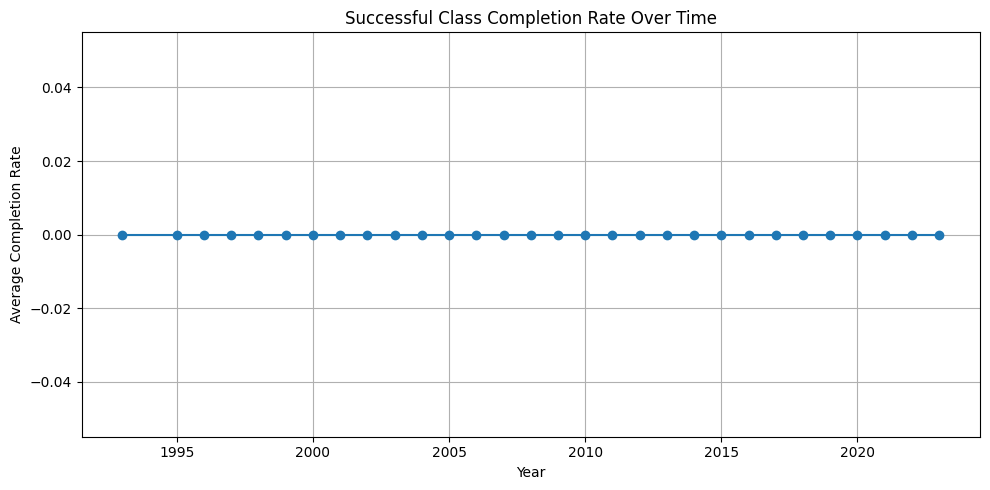

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_excel("classes.xlsx")

# Convert start date to datetime and extract year
df["START_DATE"] = pd.to_datetime(df["START_DATE"], errors="coerce")
df["YEAR"] = df["START_DATE"].dt.year

# Clean and normalize EXIT_TYPE_CD
df["EXIT_TYPE_CD"] = df["EXIT_TYPE_CD"].astype(str).str.lower().str.strip()

# Flag successful completions (you can adjust this condition based on actual values)
df["SUCCESS"] = df["EXIT_TYPE_CD"].apply(lambda x: 1 if "complete" in x or "success" in x else 0)

# Group by year to compute average success rate
completion_rate = df.groupby("YEAR")["SUCCESS"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(completion_rate["YEAR"], completion_rate["SUCCESS"], marker="o")
plt.title("Successful Class Completion Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Average Completion Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# read data from classes
classes = pd.read_excel("classes.xlsx")
# Display the first few rows of the classes data.
classes.head()

,PERSON_ID,CYCLE,PROGRAM_TITLE,CLASS_TITLE,START_DATE,STOP_DATE,EXIT_TYPE_CD
0,97737218.0,2.0,ANGER,ANGER MANAGEMENT,2012-03-15,2012-06-21,SFL
1,80832089.0,3.0,COGNITIVE,PATHWAY TO CHANGE,2016-08-02,2016-08-18,SFL
2,80832089.0,3.0,INSTITUTIONAL TREATMENT,"SHORT TERM (559.115, 217.785, BOARD)",2016-06-02,2016-09-08,SFL
3,68129888.0,2.0,LIFE SKILLS,EMPLOYABILITY SKILLS/LIFE SKILLS,2008-12-18,2009-02-25,SFL
4,78516984.0,2.0,ANGER,ANGER MANAGEMENT,2014-03-12,2014-05-28,SFL


 Filter Family-Oriented Programs

In [20]:
import pandas as pd

# Load the dataset
classes_df = pd.read_excel("classes.xlsx")

# Drop rows with missing essential values
classes_df.dropna(subset=["PERSON_ID", "PROGRAM_TITLE", "CLASS_TITLE", "EXIT_TYPE_CD", "START_DATE"], inplace=True)

# Normalize text for filtering
classes_df['PROGRAM_TITLE'] = classes_df['PROGRAM_TITLE'].astype(str).str.lower()
classes_df['CLASS_TITLE'] = classes_df['CLASS_TITLE'].astype(str).str.lower()

# Define keywords for family-oriented programs
keywords = ['family', 'parenting', 'reunification', 'relationship', 'fatherhood', 'motherhood']

# Filter based on keywords
family_classes = classes_df[
    classes_df['PROGRAM_TITLE'].str.contains('|'.join(keywords), na=False) |
    classes_df['CLASS_TITLE'].str.contains('|'.join(keywords), na=False)
]

# Reset index for cleanliness
family_classes.reset_index(drop=True, inplace=True)

# Preview
print(f"✅ Total family-related class enrollments found: {len(family_classes)}")
print(family_classes[['PERSON_ID', 'PROGRAM_TITLE', 'CLASS_TITLE', 'EXIT_TYPE_CD']].head())


✅ Total family-related class enrollments found: 5068
    PERSON_ID PROGRAM_TITLE     CLASS_TITLE EXIT_TYPE_CD
0   4030732.0     parenting  inside out dad          SFL
1  32279263.0     parenting  inside out dad          SFL
2  31135857.0     parenting  inside out dad          SFL
3    544779.0     parenting  inside out dad          SFL
4  96700411.0   life skills   relationships          SFL


Calculate Completion Rate

In [19]:
# Filter for valid completions (e.g., 'SFL' = Successful)
completed = family_classes[family_classes['EXIT_TYPE_CD'].str.upper() == 'SFL']
incomplete = family_classes[family_classes['EXIT_TYPE_CD'].str.upper() != 'SFL']

# Avoid division by zero
if len(family_classes) > 0:
    completion_rate = len(completed) / len(family_classes) * 100
    print(f"🎯 Completion Rate: {completion_rate:.2f}%")
else:
    print("⚠️ No family-related classes found to calculate completion rate.")

🎯 Completion Rate: 69.05%


Trends over time

C:\Users\cheth\AppData\Local\Temp\ipykernel_16880\4089117122.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  family_classes['START_DATE'] = pd.to_datetime(family_classes['START_DATE'], errors='coerce')
C:\Users\cheth\AppData\Local\Temp\ipykernel_16880\4089117122.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\cheth\miniconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


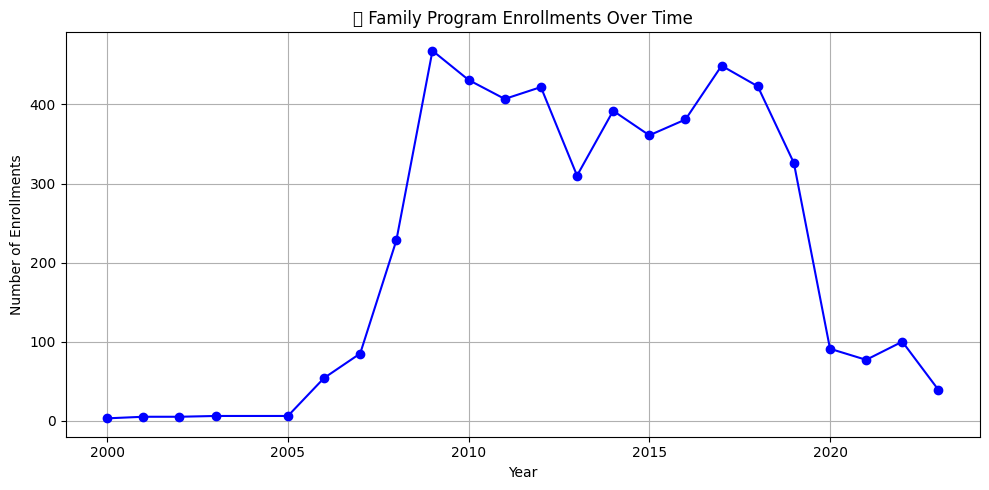

In [18]:
import matplotlib.pyplot as plt

# Convert START_DATE to datetime, drop rows with invalid dates
family_classes['START_DATE'] = pd.to_datetime(family_classes['START_DATE'], errors='coerce')
family_classes = family_classes.dropna(subset=['START_DATE'])

# Extract year from START_DATE
family_classes['YEAR'] = family_classes['START_DATE'].dt.year

# Group by year and count
enrollments_by_year = family_classes.groupby('YEAR').size()

# Plot the trend
plt.figure(figsize=(10, 5))
enrollments_by_year.plot(kind='line', marker='o', color='blue')
plt.title("📊 Family Program Enrollments Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Enrollments")
plt.grid(True)
plt.tight_layout()
plt.show()


Prograam of Inside out dad and parenting 

In [21]:
import pandas as pd

# Load your dataset
classes_df = pd.read_excel("classes.xlsx")

# Drop rows with missing relevant fields
classes_df.dropna(subset=["PROGRAM_TITLE", "CLASS_TITLE", "EXIT_TYPE_CD"], inplace=True)

# Normalize text for reliable filtering
classes_df['PROGRAM_TITLE'] = classes_df['PROGRAM_TITLE'].astype(str).str.lower()
classes_df['CLASS_TITLE'] = classes_df['CLASS_TITLE'].astype(str).str.lower()

# Define the search terms
keywords = {
    "inside_out_dad": "inside out dad",
    "parenting": "parenting",
    "relationships": "relationships"
}

# Create filtered DataFrames for each program
inside_out_dad_df = classes_df[
    classes_df['CLASS_TITLE'].str.contains(keywords["inside_out_dad"], na=False)
]

parenting_df = classes_df[
    classes_df['PROGRAM_TITLE'].str.contains(keywords["parenting"], na=False)
]

relationships_df = classes_df[
    classes_df['CLASS_TITLE'].str.contains(keywords["relationships"], na=False)
]

# Print summaries
print(f"🧔 Inside Out Dad participants: {len(inside_out_dad_df)}")
print(inside_out_dad_df[['PERSON_ID', 'PROGRAM_TITLE', 'CLASS_TITLE', 'START_DATE', 'EXIT_TYPE_CD']].head())

print(f"\n👨‍👩‍👧 Parenting program participants: {len(parenting_df)}")
print(parenting_df[['PERSON_ID', 'PROGRAM_TITLE', 'CLASS_TITLE', 'START_DATE', 'EXIT_TYPE_CD']].head())

print(f"\n💬 Relationships class participants: {len(relationships_df)}")
print(relationships_df[['PERSON_ID', 'PROGRAM_TITLE', 'CLASS_TITLE', 'START_DATE', 'EXIT_TYPE_CD']].head())




🧔 Inside Out Dad participants: 4001
      PERSON_ID PROGRAM_TITLE     CLASS_TITLE  START_DATE EXIT_TYPE_CD
109   4030732.0     parenting  inside out dad  2017-07-25          SFL
235  32279263.0     parenting  inside out dad  2016-11-15          SFL
250  31135857.0     parenting  inside out dad  2018-08-24          SFL
277    544779.0     parenting  inside out dad  2017-04-12          SFL
319  38449904.0     parenting  inside out dad  2017-11-15          SFL

👨‍👩‍👧 Parenting program participants: 4865
      PERSON_ID PROGRAM_TITLE     CLASS_TITLE  START_DATE EXIT_TYPE_CD
109   4030732.0     parenting  inside out dad  2017-07-25          SFL
235  32279263.0     parenting  inside out dad  2016-11-15          SFL
250  31135857.0     parenting  inside out dad  2018-08-24          SFL
277    544779.0     parenting  inside out dad  2017-04-12          SFL
319  38449904.0     parenting  inside out dad  2017-11-15          SFL

💬 Relationships class participants: 193
      PERSON_ID PROGRAM_TIT

Completion Rate by Program Type

In [22]:
import pandas as pd

# Load dataset
classes_df = pd.read_excel("classes.xlsx")

# Clean & normalize
classes_df.dropna(subset=["PROGRAM_TITLE", "CLASS_TITLE", "EXIT_TYPE_CD"], inplace=True)
classes_df['PROGRAM_TITLE'] = classes_df['PROGRAM_TITLE'].astype(str).str.lower()
classes_df['CLASS_TITLE'] = classes_df['CLASS_TITLE'].astype(str).str.lower()

# Define program filters
keywords = {
    "inside_out_dad": "inside out dad",
    "parenting": "parenting",
    "relationships": "relationships"
}

# Filter data
inside_out_dad_df = classes_df[classes_df['CLASS_TITLE'].str.contains(keywords['inside_out_dad'])]
parenting_df = classes_df[classes_df['PROGRAM_TITLE'].str.contains(keywords['parenting'])]
relationships_df = classes_df[classes_df['CLASS_TITLE'].str.contains(keywords['relationships'])]

# Combine all
combined_df = pd.concat([
    inside_out_dad_df.assign(PROGRAM_TYPE="Inside Out Dad"),
    parenting_df.assign(PROGRAM_TYPE="Parenting"),
    relationships_df.assign(PROGRAM_TYPE="Relationships")
])
combined_df['EXIT_TYPE_CD'] = combined_df['EXIT_TYPE_CD'].str.upper()

# Calculate completion rates
summary = (
    combined_df.groupby("PROGRAM_TYPE")["EXIT_TYPE_CD"]
    .value_counts().unstack(fill_value=0)
    .assign(Total=lambda df: df.sum(axis=1))
    .assign(CompletionRate=lambda df: round(df.get('SFL', 0) / df['Total'] * 100, 2))
)

print(summary)


EXIT_TYPE_CD    NOF   SFL  UNS  Total  CompletionRate
PROGRAM_TYPE                                         
Inside Out Dad  644  2747  610   4001           68.66
Parenting       845  3386  634   4865           69.60
Relationships    17   114   62    193           59.07


Merge with Violations and Calculate Violation Rate

In [23]:
# Load violations file
violations_df = pd.read_excel("violations.xlsx")

# Drop nulls and normalize
violations_df.dropna(subset=["PERSON_ID", "VIOLATION_DATE"], inplace=True)
violations_df["PERSON_ID"] = violations_df["PERSON_ID"].astype(str).str.strip()
combined_df["PERSON_ID"] = combined_df["PERSON_ID"].astype(str).str.strip()

# Merge on PERSON_ID
merged_df = pd.merge(combined_df, violations_df, on="PERSON_ID", how="left", indicator=True)

# Add flag for violation existence
merged_df["Has_Violation"] = merged_df["_merge"] == "both"

# Violation rate summary
violation_summary = (
    merged_df.groupby("PROGRAM_TYPE")["Has_Violation"]
    .agg(["sum", "count"])
    .rename(columns={"sum": "With_Violation", "count": "Total_Enrolled"})
)
violation_summary["ViolationRate (%)"] = round((violation_summary["With_Violation"] / violation_summary["Total_Enrolled"]) * 100, 2)
print(violation_summary)


                With_Violation  Total_Enrolled  ViolationRate (%)
PROGRAM_TYPE                                                     
Inside Out Dad           21399           22459              95.28
Parenting                25418           26736              95.07
Relationships              639             716              89.25


. Graph: Yearly Enrollment Trends

<Figure size 1200x600 with 0 Axes>

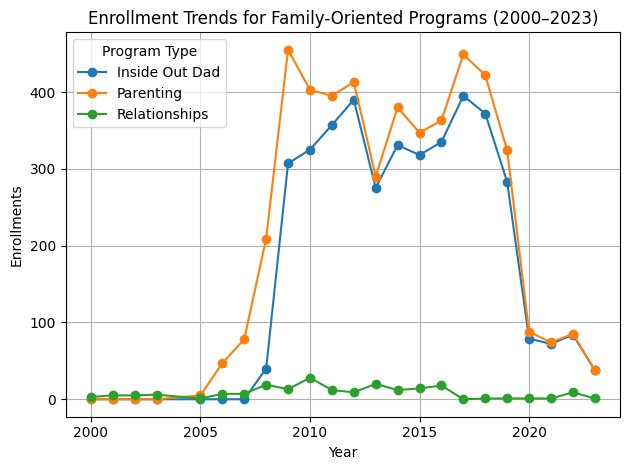

In [24]:
import matplotlib.pyplot as plt

# Parse and clean date
combined_df['START_DATE'] = pd.to_datetime(combined_df['START_DATE'], errors='coerce')
combined_df.dropna(subset=['START_DATE'], inplace=True)

# Extract year and group
combined_df['YEAR'] = combined_df['START_DATE'].dt.year
yearly_counts = combined_df.groupby(['YEAR', 'PROGRAM_TYPE']).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
yearly_counts.plot(marker='o')
plt.title("Enrollment Trends for Family-Oriented Programs (2000–2023)")
plt.xlabel("Year")
plt.ylabel("Enrollments")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Program Type")
plt.show()


In [25]:
import pandas as pd

# Step 1: Load your DOC class data
classes_df = pd.read_excel("classes.xlsx")

# Step 2: Remove rows with missing class title or completion status
classes_df.dropna(subset=["CLASS_TITLE", "EXIT_TYPE_CD"], inplace=True)

# Step 3: Normalize class titles and exit codes for consistency
classes_df['CLASS_TITLE'] = classes_df['CLASS_TITLE'].astype(str).str.strip().str.lower()
classes_df['EXIT_TYPE_CD'] = classes_df['EXIT_TYPE_CD'].astype(str).str.upper()

# Step 4: Group by class title and count exit types (e.g., SFL = successful completion)
class_summary = (
    classes_df.groupby("CLASS_TITLE")["EXIT_TYPE_CD"]
    .value_counts()
    .unstack(fill_value=0)
    .assign(Total=lambda df: df.sum(axis=1))  # Add total enrollments
    .assign(CompletionRate=lambda df: round(df.get("SFL", 0) / df["Total"] * 100, 2))  # Calculate % completed
    .sort_values(by="Total", ascending=False)  # Sort by most popular
)

# Step 5: Show top 10 most enrolled classes
class_summary = class_summary.reset_index().head(10)

# Step 6: Display result
print("Top 10 Most Popular Classes with Completion Rates:")
print(class_summary)


Top 10 Most Popular Classes with Completion Rates:
EXIT_TYPE_CD                                   CLASS_TITLE    NOF    SFL  \
0                                        pathway to change   6496  33939   
1                     short term (559.115, 217.785, board)   1488  30552   
2             high school equivalency dors education staff  17255   1979   
3                               impact of crime on victims   1972  12992   
4                                         anger management   1600   7908   
5                           6 month intermediate treatment    390   8194   
6                   high school equivalency contracted/mou   6077   1730   
7                               long term (217.362, board)    325   5344   
8                         employability skills/life skills    724   4933   
9                                           inside out dad    644   2747   

EXIT_TYPE_CD   UNS  Total  CompletionRate  
0             2933  43368           78.26  
1             2010  3405